<a href="https://colab.research.google.com/github/iamfady/potato-disease-classification_CNN/blob/main/potato_disease_classification_CNN_image_data_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village



## First, let's import the required libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization , Resizing , Rescaling , RandomFlip , RandomRotation
from keras.callbacks import EarlyStopping



import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Collect all variables in one place for easy modification


In [3]:
BATCH_SIZE = 32


IMAGE_WIDTH=256
IMAGE_HEIGHT=256
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

IMAGE_CHANNELS=3
EPOCHS=50

## Import data into tensorflow dataset object

In [4]:
!pip install split-folders

In [5]:
!splitfolders --ratio 0.8 0.1 0.1 -- /content/drive/MyDrive/Data/PlantVillage

Copying files: 2152 files [00:59, 35.88 files/s] 


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)

In [18]:
train_generator = train_datagen.flow_from_directory(
        '/content/output/train',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="sparse",
        #save_to_dir="/content/drive/MyDrive/Data/AugmentedImages"
)

Found 1721 images belonging to 3 classes.


In [9]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [10]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/output/val',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [12]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/output/test',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


## Model Architecture



In [13]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
n_classes = 3

In [14]:
model = Sequential([


    Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(64,  kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64,  kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax'),
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [16]:
#Compiling the Model

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
47/47 [==============================] - 30s 599ms/step - loss: 0.9402 - accuracy: 0.4756 - val_loss: 0.9008 - val_accuracy: 0.4427
Epoch 2/50
47/47 [==============================] - 28s 585ms/step - loss: 0.8669 - accuracy: 0.5952 - val_loss: 0.8146 - val_accuracy: 0.6667
Epoch 3/50
47/47 [==============================] - 28s 587ms/step - loss: 0.6081 - accuracy: 0.7515 - val_loss: 0.5368 - val_accuracy: 0.7917
Epoch 4/50
47/47 [==============================] - 27s 573ms/step - loss: 0.4469 - accuracy: 0.8196 - val_loss: 0.4467 - val_accuracy: 0.8177
Epoch 5/50
47/47 [==============================] - 27s 566ms/step - loss: 0.4047 - accuracy: 0.8350 - val_loss: 0.4807 - val_accuracy: 0.8073
Epoch 6/50
47/47 [==============================] - 28s 596ms/step - loss: 0.3723 - accuracy: 0.8564 - val_loss: 0.4281 - val_accuracy: 0.8646
Epoch 7/50
47/47 [==============================] - 28s 598ms/step - loss: 0.3375 - accuracy: 0.8677 - val_loss: 0.4838 - val_accuracy: 0.8125

In [20]:
scores = model.evaluate(test_generator)
print(f"Test Accuracy: {scores[1]*100}")

7/7 [==============================] - 3s 386ms/step - loss: 0.0285 - accuracy: 0.9907
Test Accuracy: 99.0740716457367




## Plotting the Accuracy and Loss Curves


In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


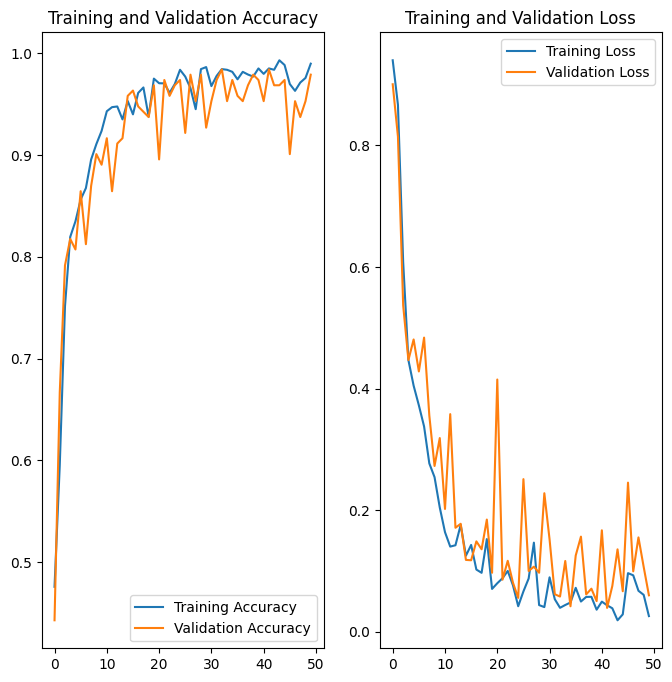

In [22]:
EPOCHS = len(history.history['loss'])

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## prediction on images

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 124ms/step
predicted label: Potato___Late_blight


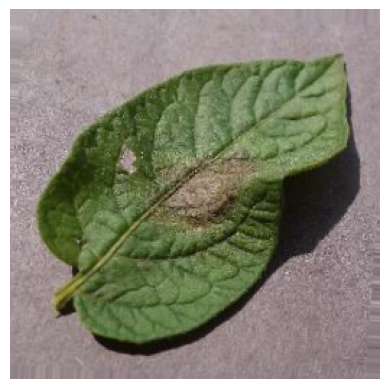

In [32]:
import numpy as np

for images_batch, labels_batch in test_generator:

    first_image = images_batch[0]
    first_label = int(labels_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")
    break

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


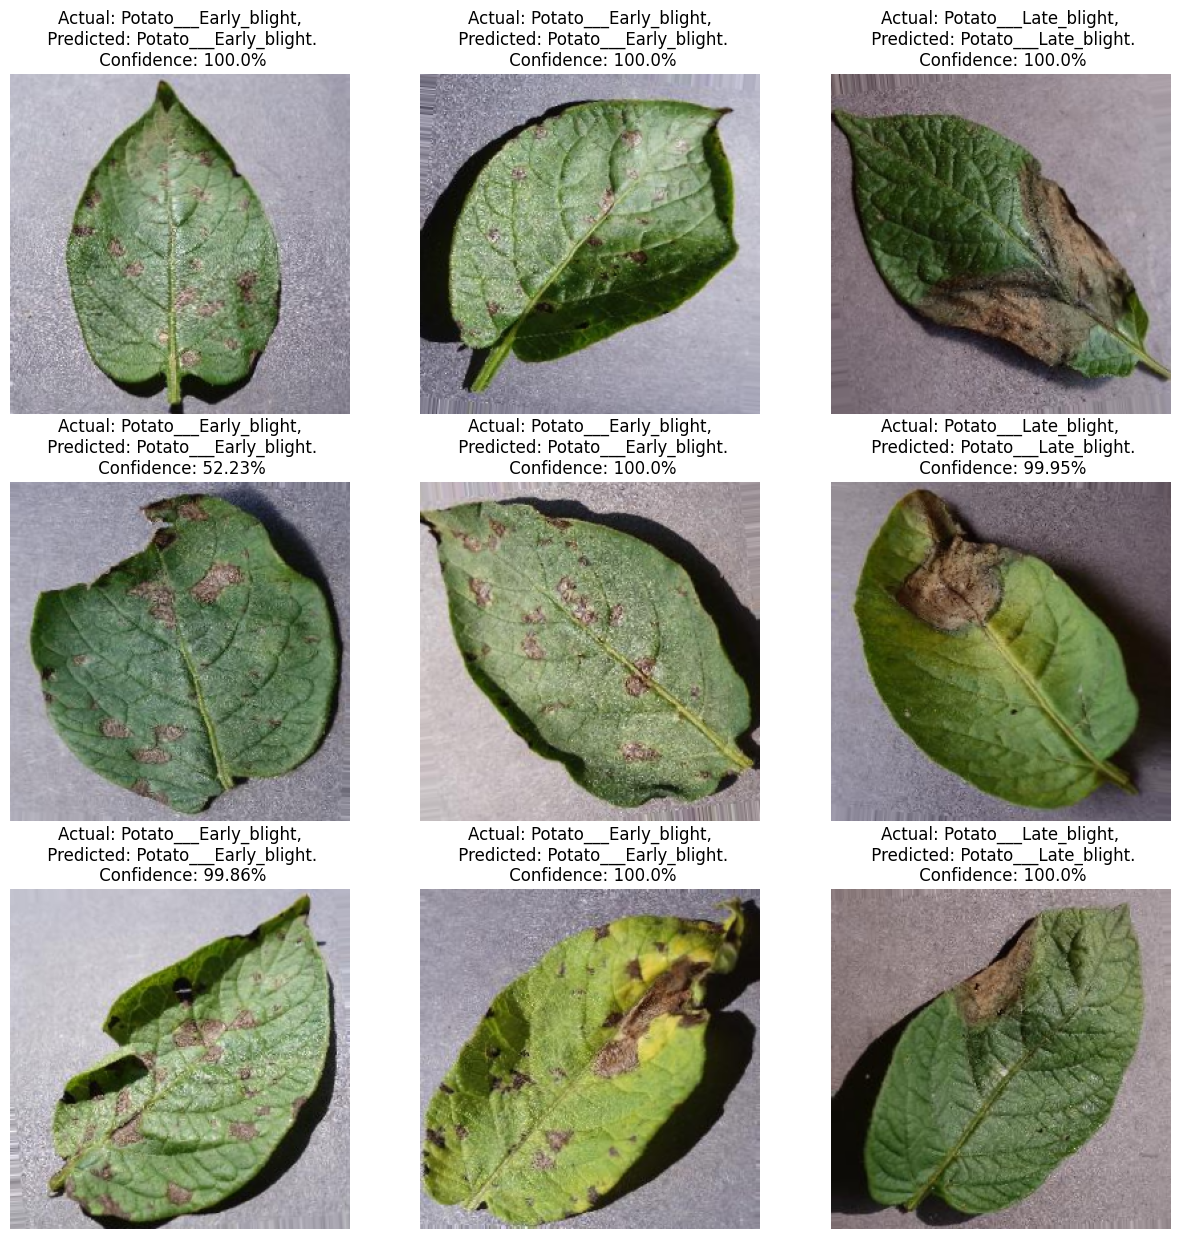

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break



## Dynamic Saving the Model


In [35]:
import os

if not os.path.exists("/content/drive/MyDrive/Data/newModels"):
    os.makedirs("/content/drive/MyDrive/Data/newModels")

In [36]:
def get_latest_model_version(model_dir):
    versions = []
    for filename in os.listdir(model_dir):
        if filename.endswith('.h5'):  # Check if it's a model file
            try:
                version = int(filename[:-3])  # Extract version number (remove '.h5')
                versions.append(version)
            except ValueError:
                pass  # Ignore files that don't follow the naming convention
    return max(versions, default=0)  # Return 0 if no model files found

model_dir = "/content/drive/MyDrive/Data/newModels"
model_version = get_latest_model_version(model_dir) + 1
model.save(f"/content/drive/MyDrive/Data/newModels/{model_version}.h5")
print("Done")

Done
